## ISEE Database for Nonlinear Force-Free Field of Solar Active Regions

> [The database](https://hinode.isee.nagoya-u.ac.jp/nlfff_database/) contains the three-dimensional (3D) magnetic fields of solar active regions analyzed by [Kusano et al. (2020)](https://doi.org/10.1126/science.aaz2511). The 3D magnetic field are extrapolated by the magnetohydrodynamic relaxation method ([Inoue et al., 2014](https://doi.org/10.1088/0004-637X/780/1/101)) from the vector magnetic field data observed by the Solar Dynamics Observatory (SDO/HMI). In this database, Space weather HMI Active Region Patch data remapped to a Lambert Cylindrical Equal-Area projection ([SHARP CEA](http://jsoc.stanford.edu/doc/data/hmi/sharp/sharp.htm)) are used. For the detailed list and parameters of the sampled data, please refer to [Kusano et al. (2020)](https://doi.org/10.1126/science.aaz2511).

![](thumbnail.png){.preview-image}

## Download a sample data

I will use the 3D magnetic field data from NOAA active region 12673 at 2017-09-06 08:36:00. The data size is about 1.5 GB.

In [ ]:
# !wget https://hinode.isee.nagoya-u.ac.jp/nlfff_database/v12/12673/20170906/12673_20170906_083600.nc

--2023-11-12 11:45:53--  https://hinode.isee.nagoya-u.ac.jp/nlfff_database/v12/12673/20170906/12673_20170906_083600.nc
Resolving hinode.isee.nagoya-u.ac.jp (hinode.isee.nagoya-u.ac.jp)... 133.47.151.53, 133.47.151.53
Connecting to hinode.isee.nagoya-u.ac.jp (hinode.isee.nagoya-u.ac.jp)|133.47.151.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1626400312 (1.5G) [application/x-netcdf]
Saving to: ‘12673_20170906_083600.nc’

12673_20170906_0836 100%[===================>]   1.51G  1.74MB/s    in 5m 11s  

2023-11-12 11:51:04 (4.99 MB/s) - ‘12673_20170906_083600.nc’ saved [1626400312/1626400312]



## A sample Python script `load_nlfff.py`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import sys

class nlfff:

      def __init__(self,filename):
            self.filename=filename

            nc=netCDF4.Dataset(self.filename,'r')
            self.NOAA=nc.NOAA
            self.year_month_day_time=nc.year_month_day_time
            self.project=nc.project
            self.production_date=nc.production_date
            self.version=nc.version
            self.data_doi=nc.data_doi
            self.http_link=nc.http_link
            self.Distributor=nc.Distributor
            
            nc_x=nc.variables['x']
            self.x=nc_x[:]
            print(nc_x.long_name,' unit:',nc_x.units)
            nc_y=nc.variables['y']
            self.y=nc_y[:]
            print(nc_y.long_name,' unit:',nc_y.units)
            nc_z=nc.variables['z']
            self.z=nc_z[:]
            print(nc_z.long_name,' unit:',nc_z.units)
            
            nc_bx=nc.variables['Bx']
            self.bx=nc_bx[:].transpose(2,1,0)
            print(nc_bx.long_name,' unit:',nc_bx.units)
            nc_by=nc.variables['By']
            self.by=nc_by[:].transpose(2,1,0)
            print(nc_by.long_name,' unit:',nc_by.units)
            nc_bz=nc.variables['Bz']
            self.bz=nc_bz[:].transpose(2,1,0)
            print(nc_bz.long_name,' unit:',nc_bz.units)
            
            nc_bxp=nc.variables['Bx_pot']
            self.bx_pot=nc_bxp[:].transpose(2,1,0)
            print(nc_bxp.long_name,' unit:',nc_bxp.units)
            nc_byp=nc.variables['By_pot']
            self.by_pot=nc_byp[:].transpose(2,1,0)
            print(nc_byp.long_name,' unit:',nc_byp.units)
            nc_bzp=nc.variables['Bz_pot']
            self.bz_pot=nc_bzp[:].transpose(2,1,0)
            print(nc_bzp.long_name,' unit:',nc_bzp.units)
            
      def info(self):
            print(f"NOAA",self.NOAA)
            print(f'year_month_day_time',self.year_month_day_time)
            print(f"project",self.project)
            print(f"production_date",self.production_date)
            print(f"version",self.version)
            print(f"data_doi",self.data_doi)
            print(f"http_link",self.http_link)
            print(f"Distributor",self.Distributor)

      def plot(self):
            xs=12.0
            ys=4.0

            xmin=min(self.x)
            xmax=max(self.x)
            ymin=min(self.y)
            ymax=max(self.y)

            plt.close()
            fig=plt.figure(figsize=(xs,ys))
            ax1=fig.add_axes((0.08,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax2=fig.add_axes((0.4,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            ax3=fig.add_axes((0.72,0.35,0.25,0.25*xs/ys*(ymax-ymin)/(xmax-xmin)))
            cax1=fig.add_axes((0.08,0.15,0.25,0.05))
            cax2=fig.add_axes((0.4,0.15,0.25,0.05))
            cax3=fig.add_axes((0.72,0.15,0.25,0.05))
            
            vmin=-3000.0 
            vmax=3000.0
            
            im1=ax1.pcolormesh(self.x,self.y,self.bx[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im2=ax2.pcolormesh(self.x,self.y,self.by[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')
            im3=ax3.pcolormesh(self.x,self.y,self.bz[:,:,0].transpose(),vmin=vmin,vmax=vmax,cmap='gist_gray',shading='auto')

            cbar1=plt.colorbar(im1,cax=cax1,orientation='horizontal')
            cbar2=plt.colorbar(im2,cax=cax2,orientation='horizontal')
            cbar3=plt.colorbar(im3,cax=cax3,orientation='horizontal')
            
            ax1.set_title('Bx [G]')
            ax1.set_xlabel('x [Mm]')
            ax1.set_ylabel('y [Mm]')
            
            ax2.set_title('By [G]')
            ax2.set_xlabel('x [Mm]')
            ax2.set_ylabel('y [Mm]')
            
            ax3.set_title('Bz [G]')
            ax3.set_xlabel('x [Mm]')
            ax3.set_ylabel('y [Mm]')
            
            plt.pause(0.1)

In [ ]:
data = nlfff('12673_20170906_083600.nc') 

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [ ]:
data.info()

NOAA 12673
year_month_day_time 2017_9_6_83600
project ISEE Database for Nonlinear Force-Free Field of Solar Active Region
production_date 2023-03-22
version v1.2
data_doi 10.34515/DATA.HSC-00000
http_link https://hinode.isee.nagoya-u.ac.jp/nlfff_database/
Distributor Hinode Science Center, Institute for Space-Earth Environmental Research, Nagoya University


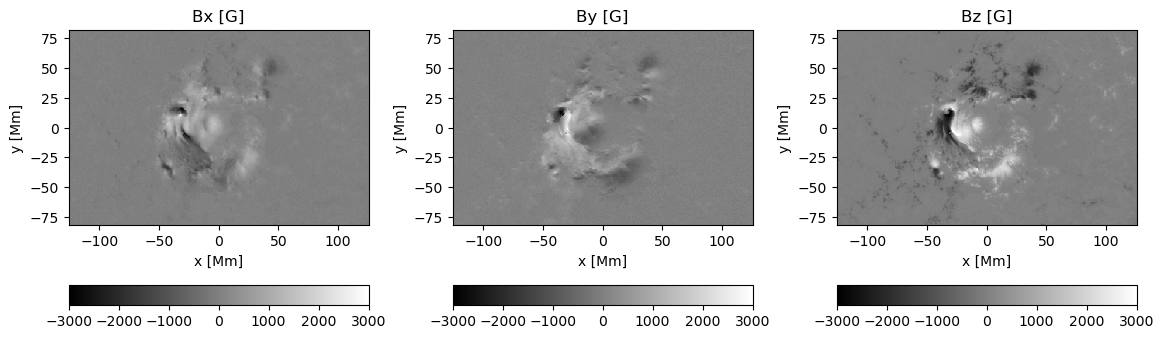

In [ ]:
data.plot()

In [ ]:
vars(data).keys()

dict_keys(['filename', 'NOAA', 'year_month_day_time', 'project', 'production_date', 'version', 'data_doi', 'http_link', 'Distributor', 'x', 'y', 'z', 'bx', 'by', 'bz', 'bx_pot', 'by_pot', 'bz_pot'])

## Visualization script

In [ ]:
import numpy as np
import pyvista as pv
import k3d
from k3d import matplotlib_color_maps

def create_coordinates(bounds):
    xbounds = (bounds[0], bounds[1])
    ybounds = (bounds[2], bounds[3])
    zbounds = (bounds[4], bounds[5])
    meshgrid = np.mgrid[xbounds[0]:xbounds[1]+1, ybounds[0]:ybounds[1]+1, zbounds[0]:zbounds[1]+1]
    return np.stack(meshgrid, axis=-1).astype(np.float32)


def create_mesh(bx, by, bz):
    bx, by, bz = map(np.array, (bx, by, bz))
    Nx, Ny, Nz = bx.shape
    co_bounds = (0, Nx-1, 0, Ny-1, 0, Nz-1)
    co_coords = create_coordinates(co_bounds).reshape(-1, 3)
    co_coord = co_coords.reshape(Nx, Ny, Nz, 3)
    x = co_coord[..., 0]
    y = co_coord[..., 1]
    z = co_coord[..., 2]
    mesh = pv.StructuredGrid(x, y, z)
    vectors = np.stack([bx, by, bz], axis=-1).transpose(2, 1, 0, 3).reshape(-1, 3)
    mesh['vector'] = vectors
    mesh.active_vectors_name = 'vector'
    magnitude = np.linalg.norm(vectors, axis=-1)
    mesh['magnitude'] = magnitude
    mesh.active_scalars_name = 'magnitude'
    return mesh


def create_mesh_xyz(x, y, z, bx, by, bz):
    x, y, z, bx, by, bz = map(np.array, (x, y, z, bx, by, bz))
    X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
    mesh = pv.StructuredGrid(X, Y, Z)
    vectors = np.stack([bx, by, bz], axis=-1).transpose(2, 1, 0, 3).reshape(-1, 3)
    mesh['vector'] = vectors
    mesh.active_vectors_name = 'vector'
    magnitude = np.linalg.norm(vectors, axis=-1)
    mesh['magnitude'] = magnitude
    mesh.active_scalars_name = 'magnitude'
    return mesh

def plot_xy_yz_zx(p, dargs, targs):
    pl = pv.Plotter()
    pl.show_bounds()
    pl.add_mesh(p.meshes[0])
    pl.add_mesh(p.meshes[1], **dargs)
    pl.add_mesh(p.meshes[2], **targs)
    pl.camera_position = 'xy'
    pl.show()

    pl = pv.Plotter()
    pl.show_bounds()
    pl.add_mesh(p.meshes[0])
    pl.add_mesh(p.meshes[1], **dargs)
    pl.add_mesh(p.meshes[2], **targs)
    pl.camera_position = 'yz'
    pl.show()

    pl = pv.Plotter()
    pl.show_bounds()
    pl.add_mesh(p.meshes[0])
    pl.add_mesh(p.meshes[1], **dargs)
    pl.add_mesh(p.meshes[2], **targs)
    pl.camera_position = 'xz'
    pl.show()


def plot_k3d(p):
    plot = k3d.plot()
    plot += k3d.vtk_poly_data(p.meshes[0])
    plot += k3d.vtk_poly_data(p.meshes[1], color_attribute=('vector-2', -2500, 2500), color_map=matplotlib_color_maps.gray)
    plot += k3d.vtk_poly_data(p.meshes[2])
    plot.display()


class plotting:
    def __init__(self, grid):
        self.grid = grid
        x_ind_min, y_ind_min, z_ind_min = 0, 0, 0
        Nx, Ny, Nz = self.grid.dimensions
        x_ind_max, y_ind_max, z_ind_max = Nx-1, Ny-1, Nz-1

        self.x_ind_min, self.y_ind_min, self.z_ind_min = x_ind_min, y_ind_min, z_ind_min
        self.x_ind_max, self.y_ind_max, self.z_ind_max = x_ind_max, y_ind_max, z_ind_max
        
        bottom_subset = (x_ind_min, x_ind_max, y_ind_min, y_ind_max, 0, 0)
        bottom = self.grid.extract_subset(bottom_subset).extract_surface()
        bottom.active_vectors_name = 'vector'
        bottom.active_scalars_name = 'magnitude'

        self.bottom = bottom

        self.x_bottom = bottom.points[:, 0].reshape(Nx, Ny)
        self.y_bottom = bottom.points[:, 1].reshape(Nx, Ny)
        self.B_bottom = bottom['vector'].reshape(Nx, Ny, 3)

        B = self.grid['vector'].reshape(Nz, Ny, Nx, 3)
        self.B = B.transpose(2, 1, 0, 3)

    def fieldline(self, window_size=None, title=None, title_fontsize=20, camera_position=None, i_siz=160, j_siz=100, i_resolution=16, j_resolution=16, vmin=-2500, vmax=2500, max_time=1000, tube_size=None):
        p = pv.Plotter()
        p.show_bounds()
        p.add_mesh(self.grid.outline())
        sargs = dict(
            title='Bz [G]',
            title_font_size=15,
            height=0.25,
            width=0.05,
            vertical=True,
            position_x = 0.05,
            position_y = 0.05,
        )
        dargs = dict(
            cmap='gray',
            scalars='vector', 
            component=2, 
            clim=(vmin, vmax), 
            scalar_bar_args=sargs, 
            show_scalar_bar=True, 
            lighting=False
        )
        p.add_mesh(self.bottom, **dargs)

        if (i_siz is not None) and (j_siz is not None):
            i_size = i_siz
            j_size = j_siz
        else:
            i_size = self.grid.bounds[1]-self.grid.bounds[0]
            j_size = self.grid.bounds[3]-self.grid.bounds[2]
        seed = pv.Plane(center=(self.grid.center[0], self.grid.center[1], 0), direction=(0,0,1), 
                i_size=i_size, j_size=j_size, 
                i_resolution=i_resolution, j_resolution=j_resolution)
        strl = self.grid.streamlines_from_source(seed,
                                                 vectors='vector',
                                                 max_time=max_time,
                                                 initial_step_length=0.1,
                                                 integration_direction='both')
        
        targs = dict(
            lighting=False,
            color='blue'
        )
        if tube_size is not None:
            p.add_mesh(strl.tube(radius=tube_size), **targs)
        else:
            p.add_mesh(strl.tube(radius=i_size/400), **targs)
        if camera_position is not None:
             p.camera_position = camera_position
        if window_size is not None:
            p.window_size = window_size
        if title is not None:
            p.add_title(title, font_size=title_fontsize)
        return p, dargs, targs

In [ ]:
pv.set_jupyter_backend('static')

## Nonlinear force-free field

### `create_mesh`

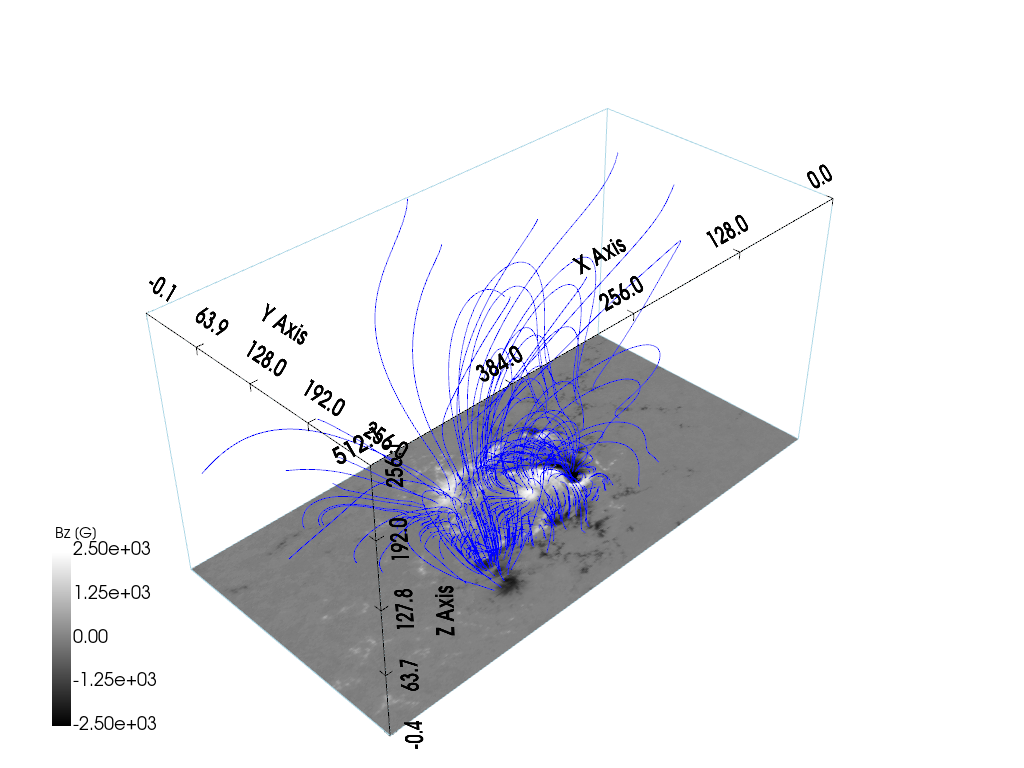

In [ ]:
mesh = create_mesh(data.bx, data.by, data.bz)
B = plotting(mesh)
p, dargs, targs = B.fieldline()
p.show()

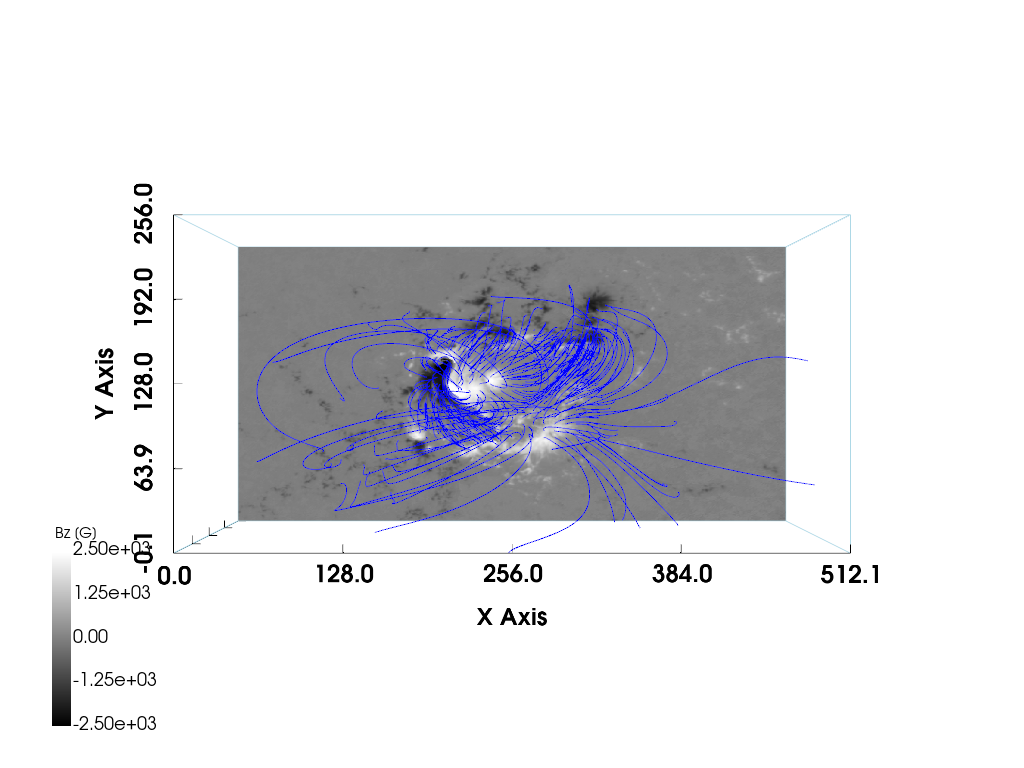

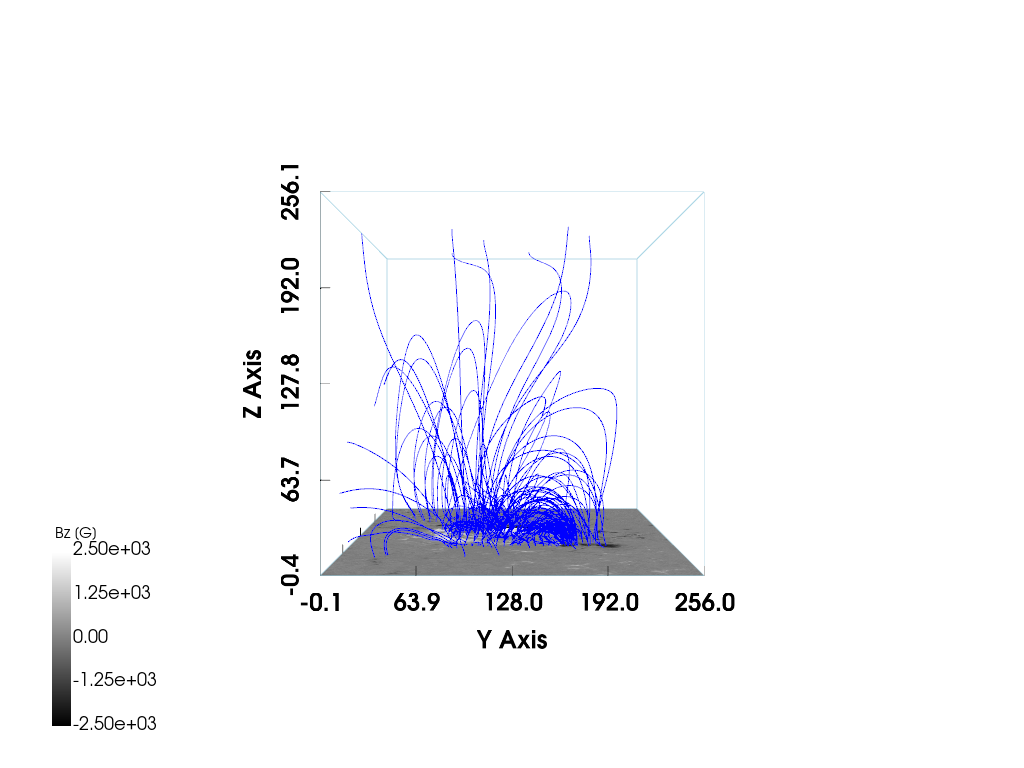

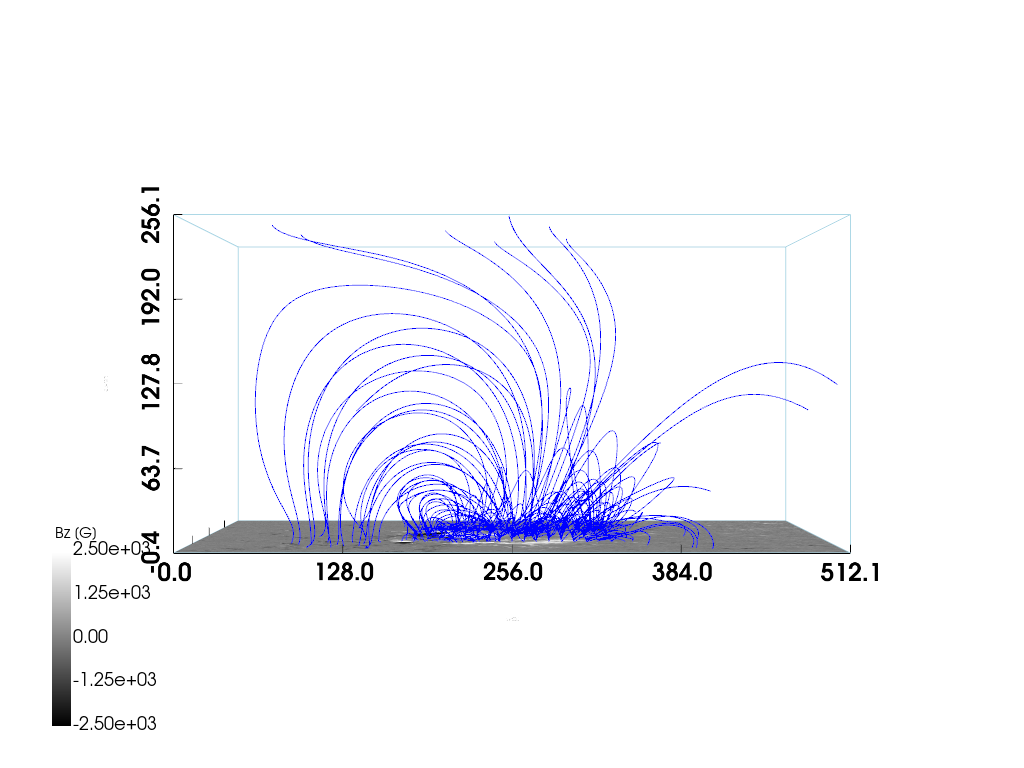

In [ ]:
plot_xy_yz_zx(p, dargs, targs)

In [ ]:
plot_k3d(p)

Output()

### `create_mesh_xyz`

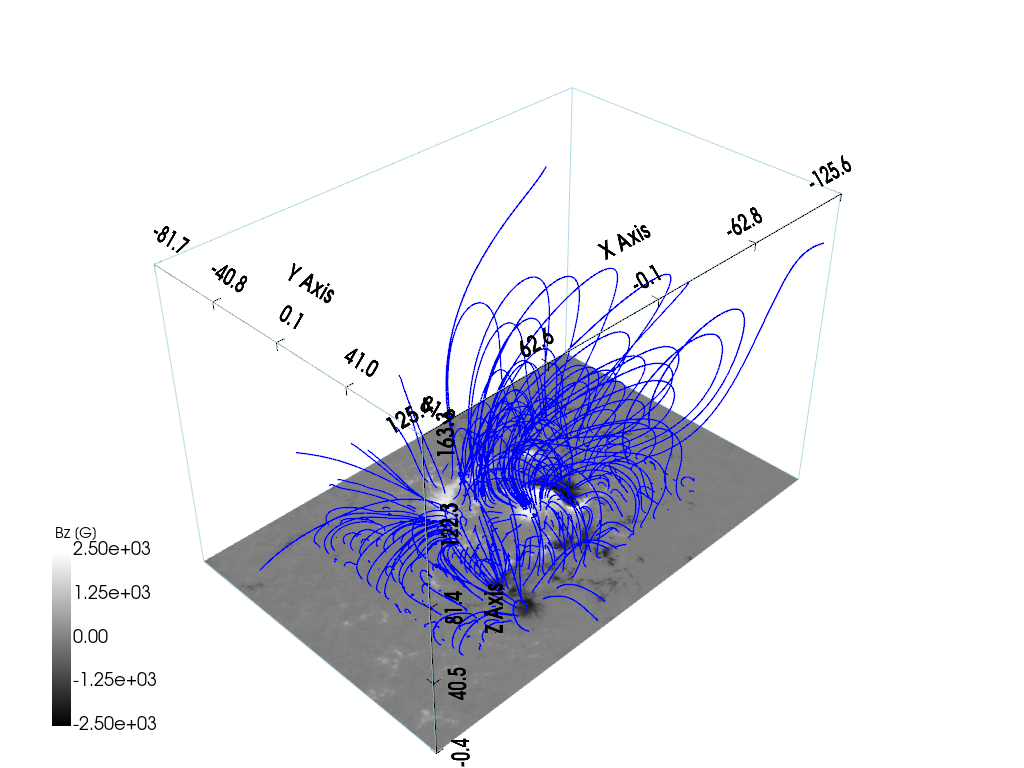

In [ ]:
mesh = create_mesh_xyz(data.x, data.y, data.z, data.bx, data.by, data.bz)
B = plotting(mesh)
p, dargs, targs = B.fieldline()
p.show()

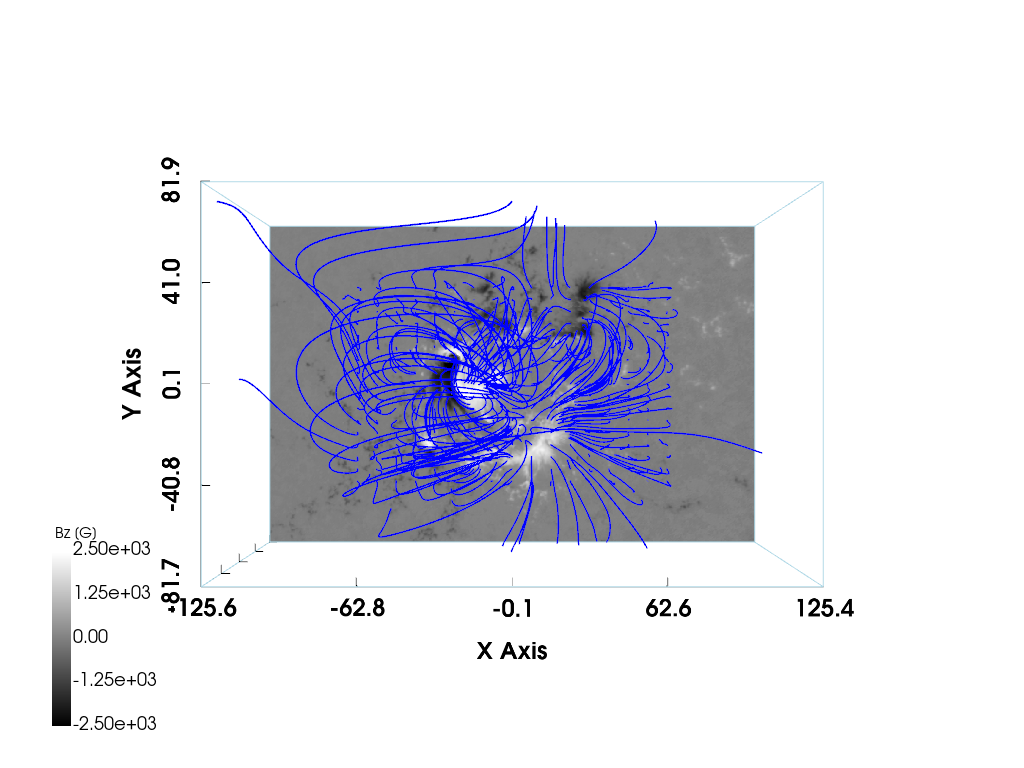

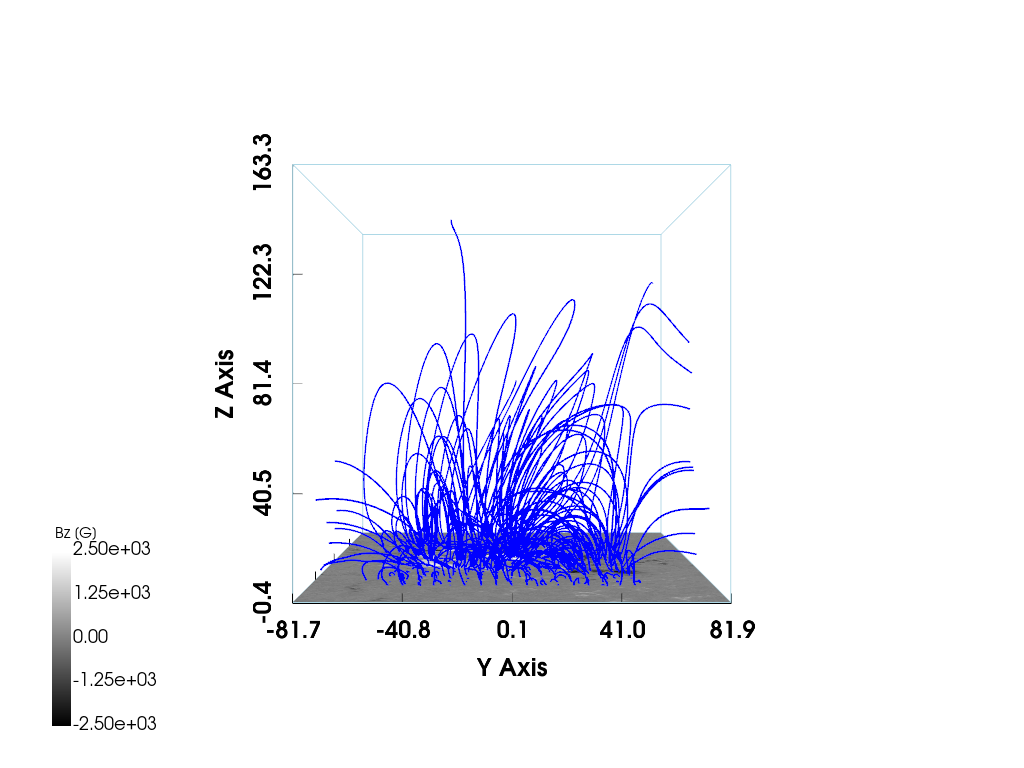

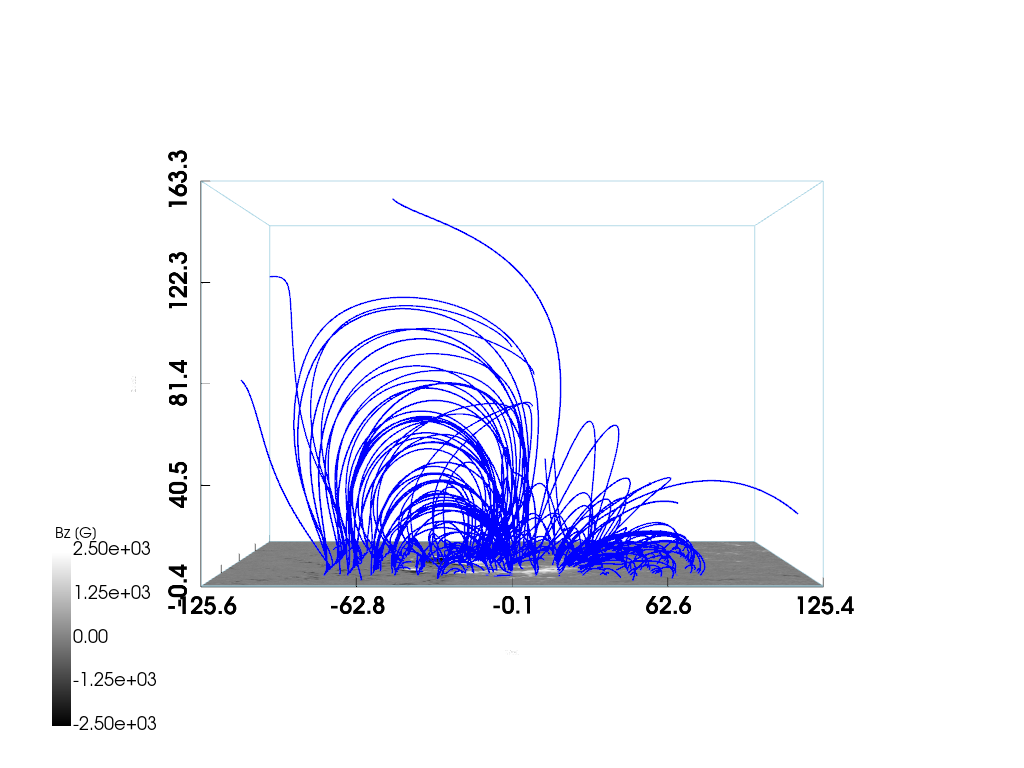

In [ ]:
plot_xy_yz_zx(p, dargs, targs)

In [ ]:
plot_k3d(p)

Output()

## Potential field

### `create_mesh`

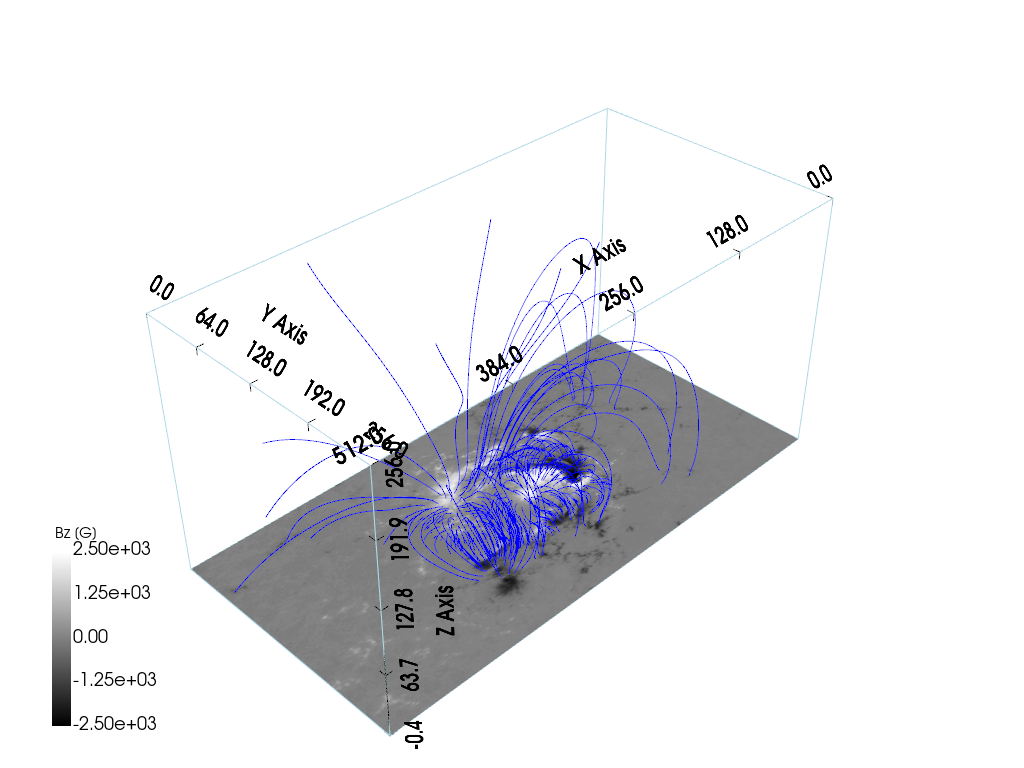

In [ ]:
mesh = create_mesh(data.bx_pot, data.by_pot, data.bz_pot)
Bp = plotting(mesh)
p, dargs, targs = Bp.fieldline()
p.show()

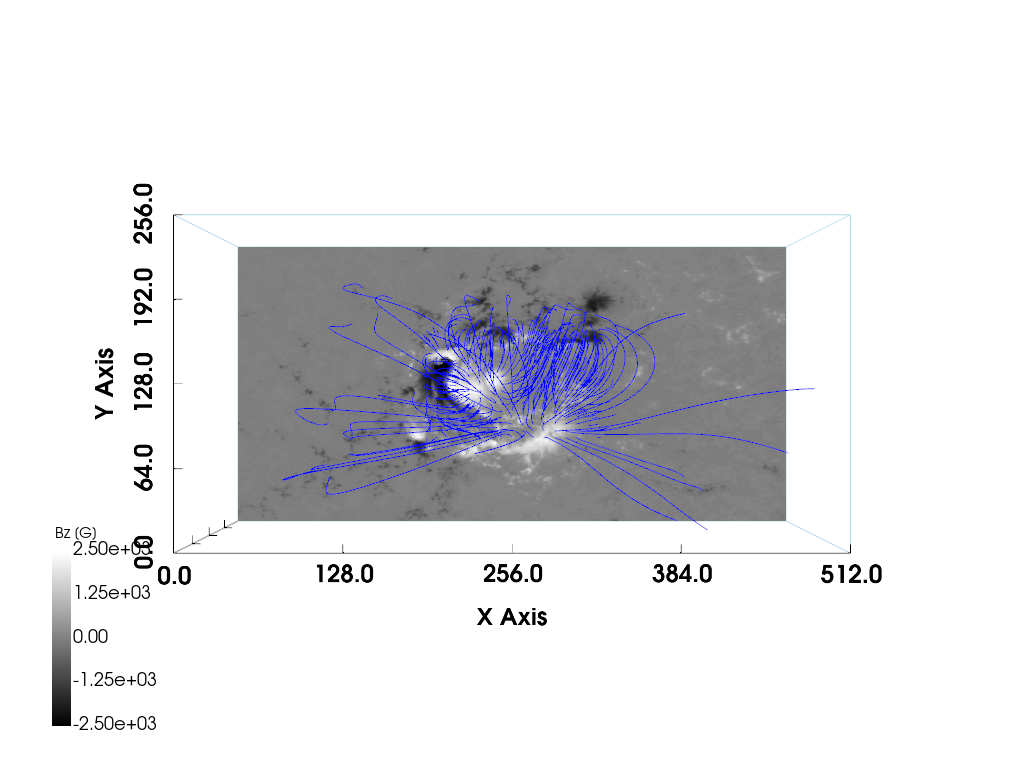

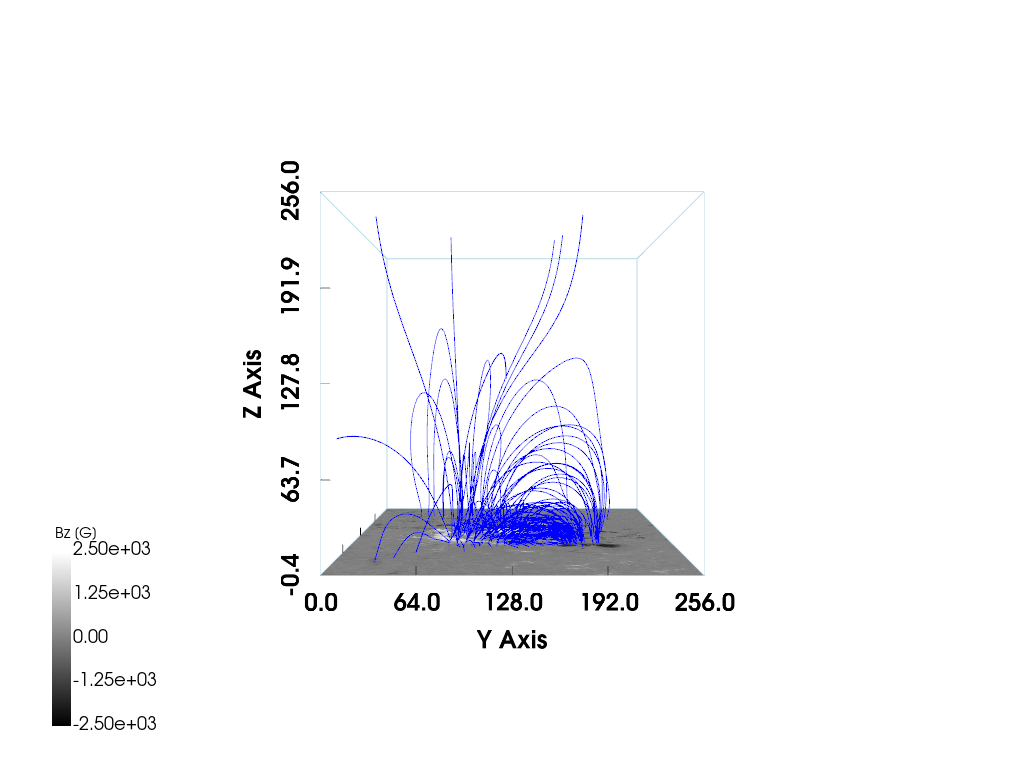

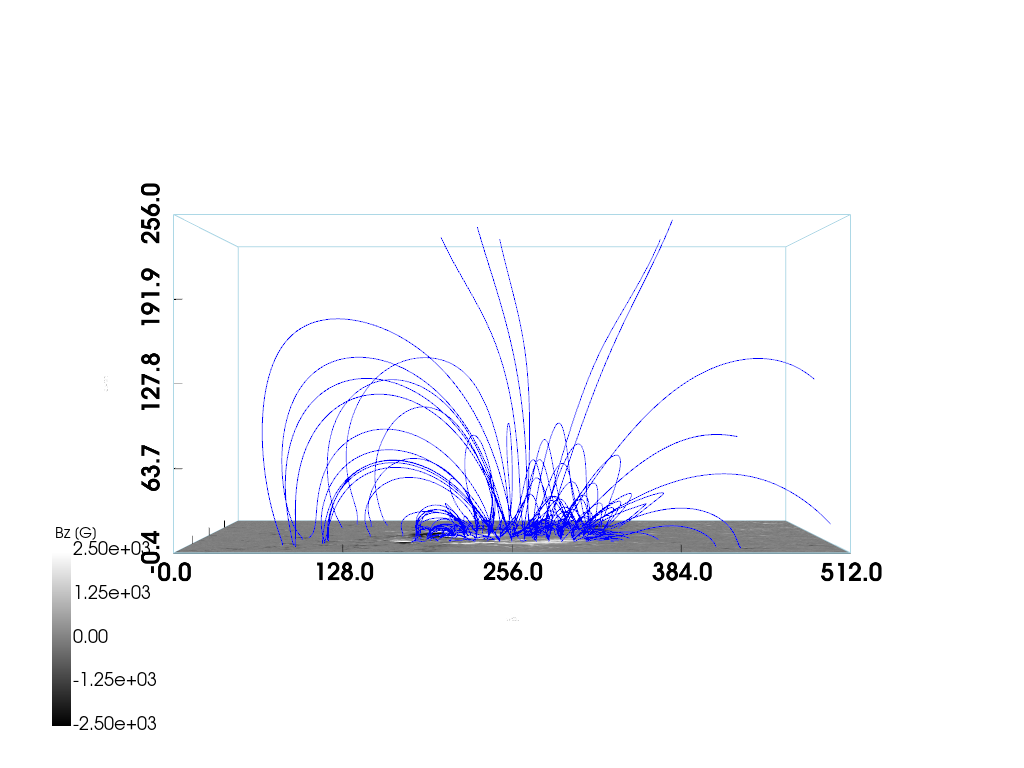

In [ ]:
plot_xy_yz_zx(p, dargs, targs)

In [ ]:
plot_k3d(p)

Output()

### `create_mesh_xyz`

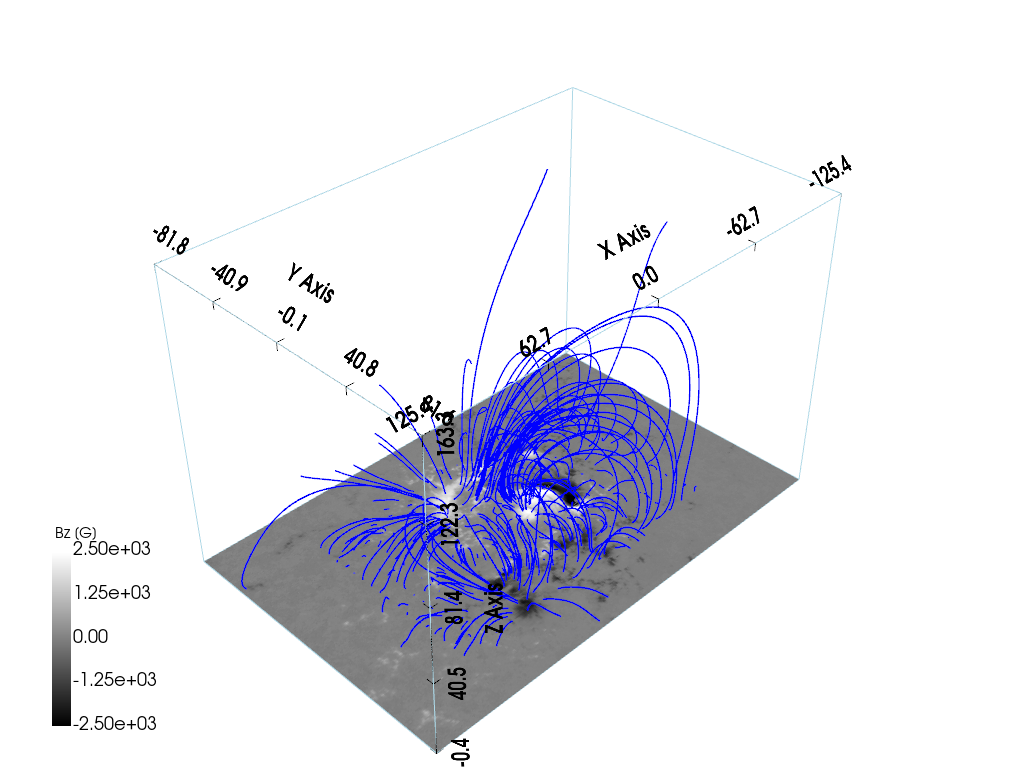

In [ ]:
mesh = create_mesh_xyz(data.x, data.y, data.z, data.bx_pot, data.by_pot, data.bz_pot)
Bp = plotting(mesh)
p, dargs, targs = Bp.fieldline()
p.show()

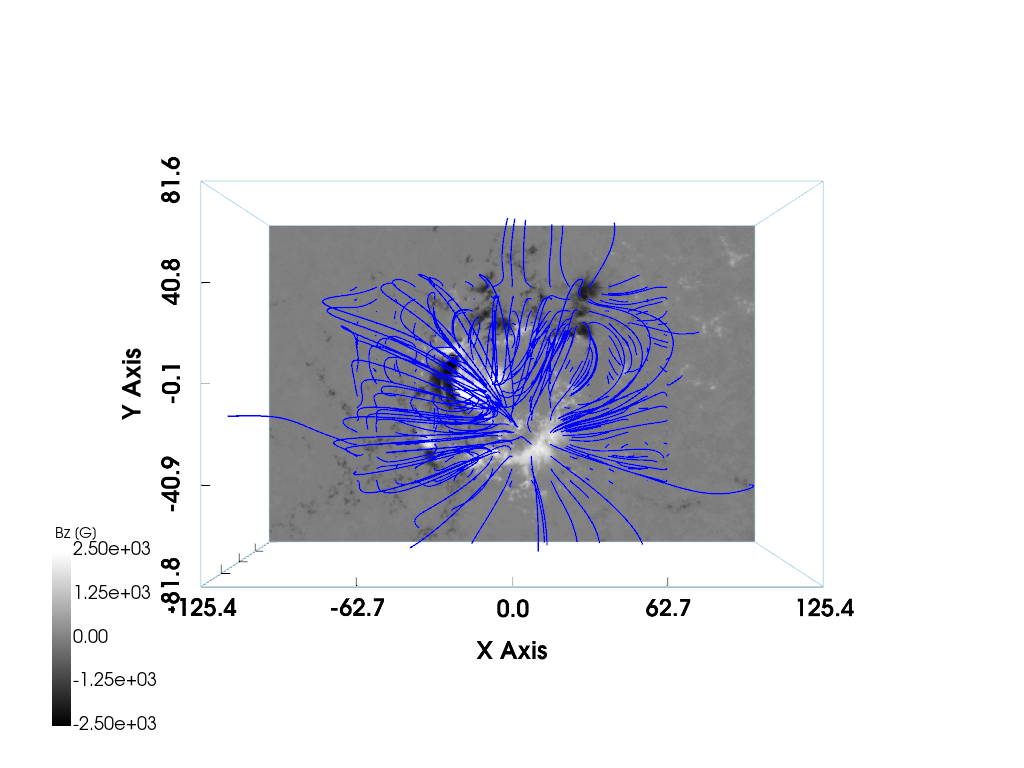

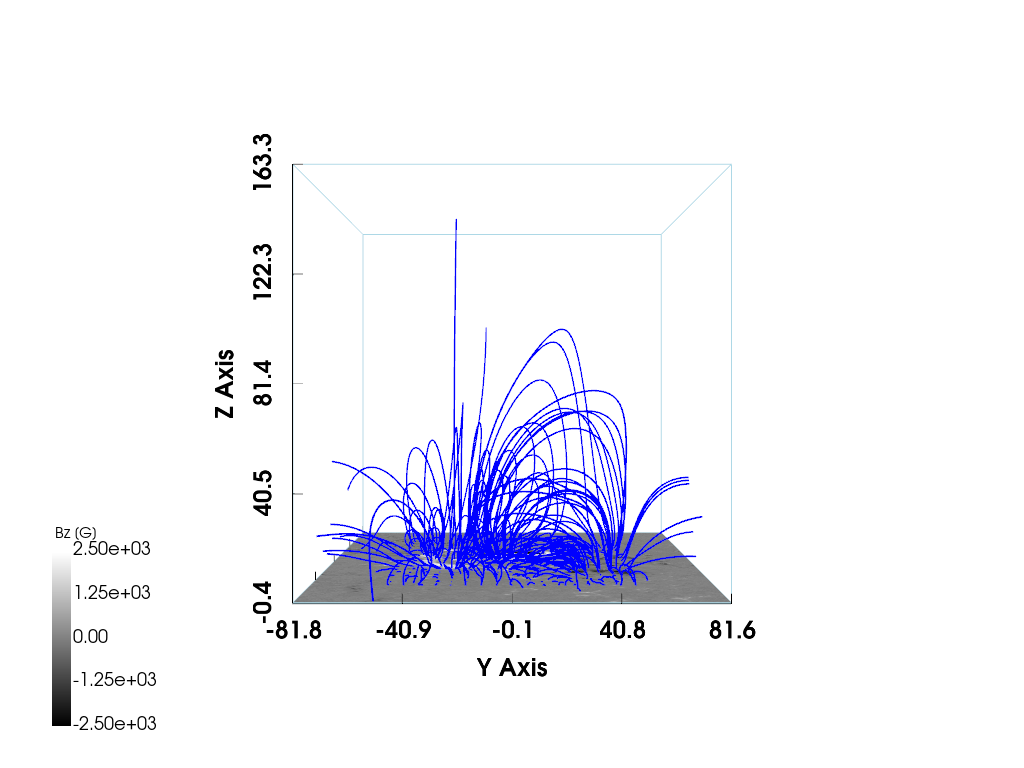

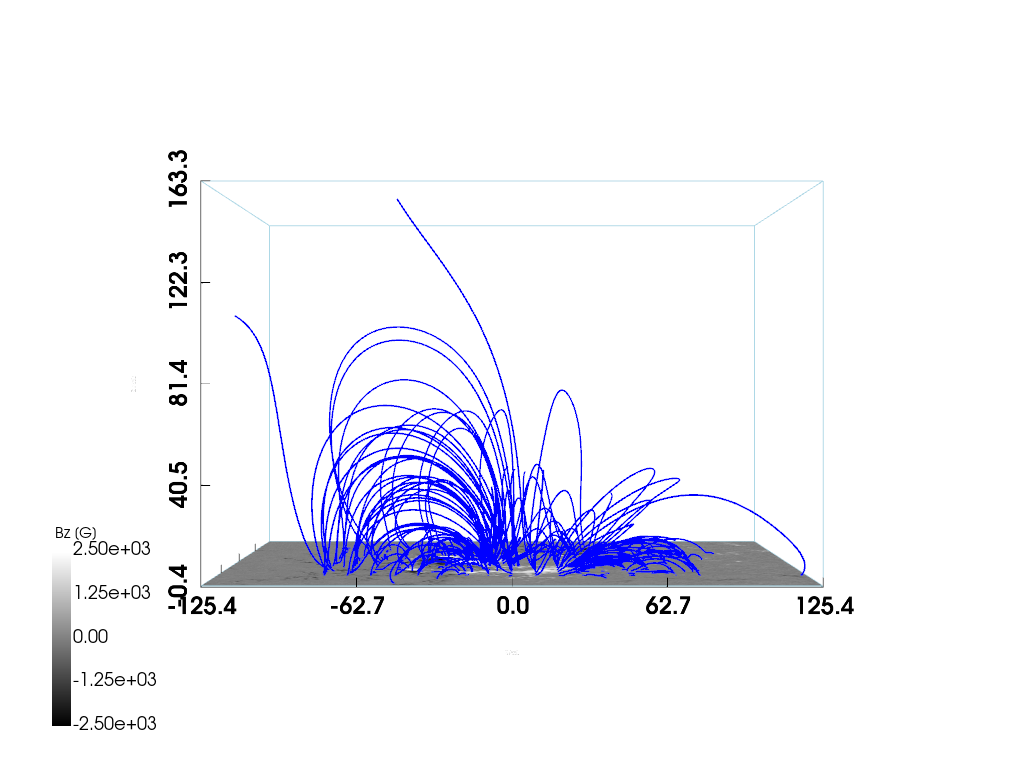

In [ ]:
plot_xy_yz_zx(p, dargs, targs)

In [ ]:
plot_k3d(p)

Output()